# Business Problem

Traffic accidents are extremely common. If you live in a sprawling metropolis like I do, chances are that you’ve heard about, witnessed, or even involved in one. Because of their frequency, traffic accidents are a major cause of death globally, cutting short millions of lives per year. Therefore, a system that can predict the occurrence of traffic accidents or accident-prone areas can potentially save lives.

Although difficult, traffic accident prediction is not impossible. Accidents don’t arise in a purely stochastic manner; their occurrence is influenced by a multitude of factors such as drivers’ physical conditions, car types, driving speed, traffic condition, road structure and weather. Studying historical accident records would help us understand the (potentially causative) relationships between these factors and road accidents, which would in turn allow us to build an accident severity predictor.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cd C:\Users\User1\OneDrive\Desktop\IBM Work\IBM Capstone Project for Crash Severity

C:\Users\User1\OneDrive\Desktop\IBM Work\IBM Capstone Project for Crash Severity


# Data Understanding

In [4]:
crash_data=pd.read_csv("Data-Collisions.csv")
print("Data has been loaded")

Data has been loaded


c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The main data set I used for this project was a detailed accident record published by SDOT Traffic Management Division of Seattle. This data set contains details about 1.6 million traffic accidents that took place in and around Seattle between 2004 to present. It consists of 38 columns and 194,673 rows which capture details such as the location, time, severity of the accidents as well as various meteorological and traffic backdrops.

Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.

Severity codes are as follows:

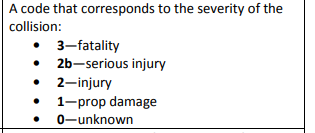

In [5]:
crash_data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Clean Dataset & Convert

In it's original form, this data is not fit for analysis. For one, there are many columns that we will not use for this model. Also, most of the features are of type object, when they should be numerical type.  We arrive at a usable dataset by dropping useless information and normalizing and balancing our remaining data. Label Encoding allows us to assign a numberical value to categorial information such as "overcast".  

In [6]:
crash_data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
drop = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY',
        'X', 'Y', 'STATUS','ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
        'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
        'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC',
        'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'COLLISIONTYPE', 'UNDERINFL']
crash_data.drop(drop, axis=1, inplace=True)

In [8]:
crash_data=crash_data.fillna(0)

In [9]:
crash_data.replace(['N'], [0], inplace=True)
crash_data.replace(['Y'], [1], inplace=True)

In [10]:
crash_data.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,2,0,0,2,0,Overcast,Wet,Daylight,0,0
1,1,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,0,0
2,1,4,0,0,3,0,Overcast,Dry,Daylight,0,0
3,1,3,0,0,3,0,Clear,Dry,Daylight,0,0
4,2,2,0,0,2,0,Raining,Wet,Daylight,0,0


In [11]:
# Label encoding
crash_data["WEATHER"] = crash_data["WEATHER"].astype('category')
crash_data["ROADCOND"] = crash_data["ROADCOND"].astype('category')
crash_data["LIGHTCOND"] = crash_data["LIGHTCOND"].astype('category')

# Assign variable to new column for analysis
crash_data["WEATHER_CAT"] = crash_data["WEATHER"].cat.codes
crash_data["ROADCOND_CAT"] = crash_data["ROADCOND"].cat.codes
crash_data["LIGHTCOND_CAT"] = crash_data["LIGHTCOND"].cat.codes

In [30]:
crash_data.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,2,0,0,2,0,Overcast,Wet,Daylight,0,0,5,9,6
1,1,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,0,0,7,9,3
2,1,4,0,0,3,0,Overcast,Dry,Daylight,0,0,5,1,6
3,1,3,0,0,3,0,Clear,Dry,Daylight,0,0,2,1,6
4,2,2,0,0,2,0,Raining,Wet,Daylight,0,0,7,9,6


In [12]:
crash_data.shape

(194673, 14)

We can now use this data in our analysis and ML models!  Now let's check the data types of the columns in our dataframe.

In [13]:
crash_data.dtypes

SEVERITYCODE         int64
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INATTENTIONIND       int64
WEATHER           category
ROADCOND          category
LIGHTCOND         category
PEDROWNOTGRNT        int64
SPEEDING             int64
WEATHER_CAT           int8
ROADCOND_CAT          int8
LIGHTCOND_CAT         int8
dtype: object

Here in our target variable "SEVERITYCODE" we see that there is a disproportiante distribution of values in our feature.  For accurate predictions our target variable should have an equal sampling, otherwise our predictions will be wrong.  

In [14]:
crash_data['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

To balance "SEVERITYCODE", we use a resample module from matplotlib.  That will downsample the majority class within "SEVERITYCODE".  

In [15]:
!pip3 install scikit-learn scipy matplotlib

In [16]:
from sklearn.utils import resample

In [17]:
# Seperate majority and minority classes
crash_data_majority = crash_data[crash_data.SEVERITYCODE==1]
crash_data_minority = crash_data[crash_data.SEVERITYCODE==2]

#Downsample majority class
crash_data_majority_downsampled = resample(crash_data_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
crash_data_balanced = pd.concat([crash_data_majority_downsampled, crash_data_minority])

# Display new class counts
crash_data_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

# Methodology
Our data is now ready to be fed into machine learning models.

We will use the following models:

Random Forest Decision Tree A random decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different variables such as number of pedestrians, vehicles involved, weather conditions, et al.

K-Nearest Neighbor (KNN)
KNN will help us predict the severity code of an outcome by finding the most similar to data point within k-fold distance.  The down side of this model is that we have to test many fold numbers before we find the optimal one.

Logistic Regression
Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

To begin loading our models, we have to initialize, define X and Y and normalize our data so all our inputs are in the same scale:

In [18]:
###Initialize, define X and Y
import numpy as np

x = np.asarray(crash_data_balanced[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND',
                                    'PEDROWNOTGRNT', 'SPEEDING', 'WEATHER_CAT', 'ROADCOND_CAT',
                                    'LIGHTCOND_CAT']])
x[0:5]

array([[ 2,  0,  0,  2,  0,  0,  0,  7,  9,  3],
       [ 2,  0,  0,  2,  0,  0,  0,  2,  1,  6],
       [ 2,  0,  0,  2,  0,  0,  0, 11,  8,  9],
       [ 2,  0,  0,  2,  0,  0,  0,  2,  1,  6],
       [ 3,  0,  0,  2,  0,  0,  0,  2,  1,  6]], dtype=int64)

In [20]:
y_hat = np.asarray(crash_data_balanced['SEVERITYCODE'])
y_hat [0:5]
print ("Initilization of X and Y finished", y_hat)

#initilization of X and Y finished

Initilization of X and Y finished [1 1 1 ... 2 2 2]


Next, we normalize our dataset to ensure all the figures are on the same scale.  Our dataset contains different information such as number of pedestrians, number of cars involved, as well as figures for weather conditions and booleen values expressed as 1 or 2.

In [21]:
###Normalize dataset

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:14]

###Normalization of dataset finished

array([[-0.36911465, -0.23764842, -0.21264054,  0.14288121, -0.43697754,
        -0.1981104 , -0.23274155,  1.15236718,  1.52797946, -1.21648407],
       [-0.36911465, -0.23764842, -0.21264054,  0.14288121, -0.43697754,
        -0.1981104 , -0.23274155, -0.67488   , -0.67084969,  0.42978835],
       [-0.36911465, -0.23764842, -0.21264054,  0.14288121, -0.43697754,
        -0.1981104 , -0.23274155,  2.61416492,  1.25312582,  2.07606076],
       [-0.36911465, -0.23764842, -0.21264054,  0.14288121, -0.43697754,
        -0.1981104 , -0.23274155, -0.67488   , -0.67084969,  0.42978835],
       [ 0.33549933, -0.23764842, -0.21264054,  0.14288121, -0.43697754,
        -0.1981104 , -0.23274155, -0.67488   , -0.67084969,  0.42978835],
       [ 1.04011332, -0.23764842, -0.21264054,  0.14288121, -0.43697754,
        -0.1981104 , -0.23274155, -0.67488   , -0.67084969,  0.42978835],
       [-0.36911465, -0.23764842, -0.21264054,  0.14288121, -0.43697754,
        -0.1981104 , -0.23274155, -0.67488   

Then we split our dataset into training and testing samples.  We will use 30% of our dataset for training and 70% for testing, which is a normal range to use in the begining of data analysis.

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_hat, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)
print("Train/test split finished")

Train set: (81463, 10) (81463,)
Test set: (34913, 10) (34913,)
Train/test split finished


# The Models

Here we feed the models with our training and test split and try to derive a prediction!

The first model up is the Random Forest Regressor.

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
###random forest regressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


print ('Prediction is',y_pred [0:14])
print ('Test is',y_test [0:14])

Prediction is [1.98210209 1.58476267 1.04133335 1.04990906 1.38438065 1.62999401
 1.60910124 1.4851521  1.58516928 1.04000016 2.         1.58516928
 1.3530462  1.58516928]
Test is [2 2 1 1 1 2 1 1 1 1 2 1 1 1]


The K Nearest Neighbor is the next model up.

In [27]:
# Building the KNN Model
from sklearn import neighbors

cls = neighbors.KNeighborsClassifier()
cls.fit(x_train, y_train)
accuracy =cls.score(x_train, y_train)
print("Accuracy is:", accuracy)

k_hat_pred = cls.predict(x_test)
print("Prediction is", k_hat_pred)

Accuracy is: 0.6497673790555222
Prediction is [2 2 1 ... 1 2 2]


The Logistic Regression model is up now.  

In [28]:
# Building the LR Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=6, solver='liblinear')

In [29]:
LRyhat = LR.predict(x_test)
LRyhat

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

In [30]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.0602781 , 0.9397219 ],
       [0.45719898, 0.54280102],
       [0.74706017, 0.25293983],
       ...,
       [0.57796883, 0.42203117],
       [0.51134532, 0.48865468],
       [0.04192822, 0.95807178]])

# EVALUATIONS

Random Forest Regressor

In [31]:
#Evaluations
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=100)

#cross validation
score1 = cross_val_score(regressor, x, y_hat, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score1.mean()*100, score1.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset.

mean accuracy 16.64% (standard deviation 0.50%)


In [58]:
from sklearn.metrics import r2_score

In [63]:
r_square = metrics.r2_score(y_test, y_pred)
print ("R2 is ", r_square)

R2 is  0.16572714368785746


K Nearest Neighbor

In [76]:
from sklearn.metrics import f1_score

In [77]:
f1_score(y_test, k_hat_pred, average='macro')

0.6420007053436809

Logistic Regression

In [78]:
from sklearn.metrics import log_loss

In [79]:
yhat_prob = LR.predict_proba(x_test)
log_loss(y_test, yhat_prob)   

0.6115608024815529

# DISCUSSION

We began with data that needed to be standardized and cleaned so it could be used later.  We identified categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so label encoding was used to created new classes that were of type int, and interger.

After solving that issue we were presented with another - imbalanced data. As seen previously, "SEVERITYCODE 1" was nearly three times larger than "SEVERITYCODE 2".  The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 58188 values each.  We could then use "SEVERITYCODE" as our target feature.

Once we analyzed and cleaned the data, it was then fed through three ML models; Random Forest Decision Tree, K-Nearest Neighbor and Logistic Regression. 

Evaluation metrics used to test the accuracy of our models were R2 square, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

In hindsight, I would use a scatter plot against the data to determine if there is a linear relationship within my data, which would help me identify if a linear regression classifier, logistic regressor or cluster forest tree is more appropriate from the start.  I also would take more time to find a helper function to identify the optimal k fold number and eliminate the trial and error in finding the best k fold.  

# Conclusions

As I look through the predictions for y_hat and inputs for x, it is not clear to me that one or more feature had more weight in predicting the severity code.  All we can say is that all the features of x being equal, the K Nearest Neighbor will choose the most likey severity code, property damage (1) or injury (2), and choose correctly 64% of the time with high precision and recall.  If I am being injured I would want that accuracy to be higher!  If we reduce the number of features in x, we should be able to say something more precise about the impact of two or three features than the 13 we included in our study.  The Random Forest Model and Logostic Regressor did not perform well at all with an r2 of .16 and mean accuracy of 16.64 and standard deviation of .50%.  To get better results, the dataset needs to be increased in rows and the features accounted for need to be reduced to allow insights to be learned.    